## Sentiment Analysis of Political Tweets

As discussed in class, sentiment analysis tries to measure the positive or negative sentiment expressed in a message.  It is commonly used to track the mood of the nation on all kinds of topics through the analysis of Twitter data.  

This is a simple example of using the NLTK sentiment analysis package to look at sentiment of tweets about the NSW Liberal and Labor parties.  Unfortunately I've not been able to collect very much data from twitter because of their rate limits, so we only have around 250 tweets in each case.  However, we can use this as a sample to test the basic methodology.

First we'll read in the tweets from a CSV file:

In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline 

liberal = pd.read_csv('nswliberal.csv')
labor = pd.read_csv('nswlabor.csv')
liberal.head()
print(len(liberal))
print(len(labor))

197
192


We can use the NLTK python package to do sentiment analysis.  It contains all of the tools you need to build your own analyisis engine based on training data you have labelled yourself, but it also has a pre-built sentiment analysis engine called [VADER](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html).  VADER uses word lists of positive and negative words and returns a set of ratings that count the proportion of positive and negative words in a text.  A final metric *compound* is a combination score that is +1 for a very positive text and -1 for a negative one.  

We first need to download the lexicon (word list) for NLTK to work, we then make a sentiment analyser and apply it to every row of the data with the apply method.  

In [2]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

liberal_sent = liberal.apply(lambda r: sid.polarity_scores(r.text), axis=1)
labor_sent = labor.apply(lambda r: sid.polarity_scores(r.text), axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mostafa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# turn the result into a data frame and add as columns to the original data
df = pd.DataFrame(list(liberal_sent))
liberal_s = liberal.join(df)

df = pd.DataFrame(list(labor_sent))
labor_s = labor.join(df)

labor_s.head()

,created,text,neg,neu,pos,compound
0,Thu Oct 12 20:27:43 +0000 2017,#GladysBerejiklian Donations For Access Rife i...,0.000,1.000,0.000,0.0000
1,Thu Oct 12 20:10:27 +0000 2017,I don’t think @NSWLabor got the message on gun...,0.124,0.876,0.000,-0.3400
2,Thu Oct 12 10:01:23 +0000 2017,@stukhan @NSWLabor But it makes for one hell o...,0.464,0.536,0.000,-0.8316
3,Thu Oct 12 08:58:52 +0000 2017,.@NSWLabor supports keeping Springvale mine op...,0.168,0.745,0.087,-0.3898
4,Thu Oct 12 07:52:19 +0000 2017,RT @NSWLabor: What do you think ? https://t.co...,0.000,1.000,0.000,0.0000


So, now you have sentiment data for the NSW Liberal and Labor parties.  Your task now is to generate some useful intelligence from this data.   You might ask:

- what is the spread of sentiment for each party
- who is ahead on the sentiment scale - how do they compare?
- what are the most positive and negative issues in each case?

Your checkpoint this week is to show us a useful plot or summary statistic based on this data along with your interpretation.

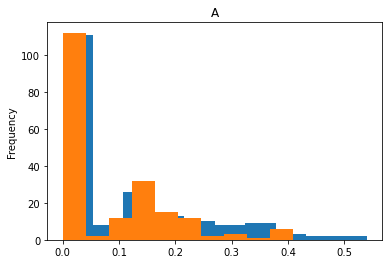

In [4]:
box_sl = labor_s['pos'].plot(kind="hist", title="a")
box_sw = liberal_s['pos'].plot(kind="hist", title="A")

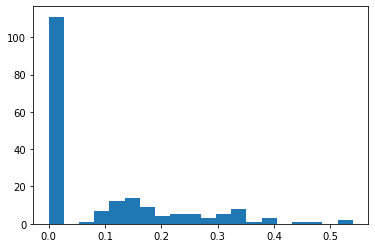

In [5]:
import matplotlib.pyplot as plt
plt.hist(labor_s['pos'], bins = 20)
plt.show()

In [6]:
print(labor_s['pos'])

0      0.000
1      0.000
2      0.000
3      0.087
4      0.000
       ...  
187    0.000
188    0.000
189    0.000
190    0.000
191    0.000
Name: pos, Length: 192, dtype: float64


<AxesSubplot:>

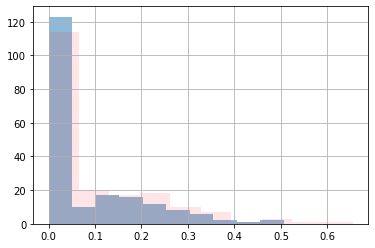

In [8]:
lib_neg = liberal_s['neg']
lib_neg.hist( histtype = 'stepfilled', alpha = 0.5)
labour_neg = labor_s['neg']
labour_neg.hist( histtype = 'stepfilled', alpha = 0.1, color = 'red')

<AxesSubplot:>

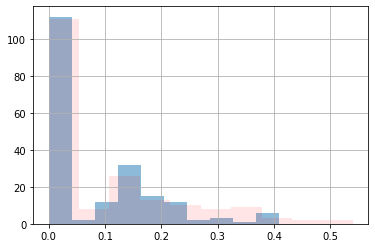

In [10]:
lib_pos = liberal_s['pos']
lib_pos.hist(histtype = 'stepfilled', alpha = 0.5)
labour_pos = labor_s['pos']
labour_pos.hist(histtype = 'stepfilled', alpha = 0.1, color = 'red')

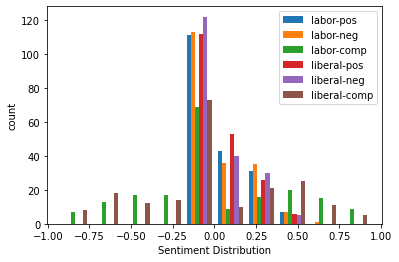

In [11]:
import matplotlib.pyplot as plt
# Set up a figure with set of axes
fig, ax = plt.subplots(1, 1)

# Add axis labels
ax.set_xlabel('Sentiment Distribution')
ax.set_ylabel('count');

# Generate the histogram for Sentiment 
_ = ax.hist((labor_s['pos'],labor_s['neg'],labor_s['compound'], liberal_s['pos'], liberal_s['neg'],liberal_s['compound']))

# Add a legend
ax.legend(('labor-pos', 'labor-neg','labor-comp', 'liberal-pos','liberal-neg','liberal-comp'), loc='upper right');

In [12]:
liberal_s[(liberal_s['compound'] > 0.5)]

,created,text,neg,neu,pos,compound
15,Thu Oct 12 01:31:47 +0000 2017,@matt_barrie @LiberalNSW @CloverMoore A great ...,0.000,0.814,0.186,0.6249
33,Tue Oct 10 05:22:38 +0000 2017,Thanks @LiberalNSW :) Always looking out for y...,0.000,0.604,0.396,0.7096
34,Tue Oct 10 02:19:55 +0000 2017,@Dom_Perrottet @LiberalNSW Congratulations! Th...,0.000,0.610,0.390,0.6688
35,Tue Oct 10 00:19:11 +0000 2017,@stuartayresmp @westconnex @NSWBC @LiberalNSW ...,0.000,0.675,0.325,0.8481
53,Sun Oct 08 08:12:08 +0000 2017,No one in their right mind would trust their w...,0.081,0.699,0.221,0.5859
78,Thu Oct 05 11:51:56 +0000 2017,RT @cristalacko: Always a pleasure to talk to ...,0.000,0.720,0.280,0.7650
80,Thu Oct 05 10:45:38 +0000 2017,Always a pleasure to talk to our former Premie...,0.000,0.680,0.320,0.7650
84,Thu Oct 05 05:55:40 +0000 2017,@protecttheplain @GladysB Horse stud farms are...,0.000,0.756,0.244,0.6705
96,Wed Oct 04 07:34:15 +0000 2017,RT @CyclingFoodie: @LiberalNSW By selling ever...,0.000,0.757,0.243,0.7269
98,Wed Oct 04 07:33:22 +0000 2017,@LiberalNSW By selling everything not nailed d...,0.000,0.736,0.264,0.7269


In [16]:
neg_text = liberal_s[(liberal_s['compound'] < -0.5)]['text']
for x in neg_text:
    print(x)

@LiberalNSW Everyone with 1/2 a brain knows that. Now build some brand new Coal Fired Power Stations &amp; fix this mess
Not a good look for @LiberalNSW @LiberalAus Hundreds of abuse allegations of SWD in NSW schools and they don't seem… https://t.co/rAhMSg1E7G
E10 petrol is  shit @2GBNews @mattkeanNSW @LiberalNSW
@capital_hunter @LiberalNSW @sffAustralia @NSWNationals guns. guns. guns. death. killing. yeah! go. guns. death. #killthemall
Chill out Sydney.
Your drinking water, via legislation @LiberalNSW, allows mining cos to pollute the water catchmen… https://t.co/4KYL4GR0Wy
@sandylanceley @LiberalNSW @KentJohns Only 40%? The rabid left and bra burners will hate him for that!
.@LiberalNSW President @KentJohns wants a 40% quota for female liberal parliamentarians. 

Slow death of principles

https://t.co/KaSulURVtO
https://t.co/mMLncJS1sO
@sffAustralia @GladysB @maasmuseum @nsw_upperhouse @NSWNationals @LiberalNSW I think Borsak should go try to kill a… https://t.co/GaRXlKJi6b
#innerwe